Analytical

https://wenku.baidu.com/view/ba5a98154431b90d6c85c741.html

In [ ]:
\[Mu]1 = q/(1+q);
\[Mu]2 = 1/(1+q);
r0 = {X, 0};
(* source position: *)
x = {x1, x2};
(* image position: *)
r = {r1, r2};
lensequ = x - (r - \[Mu]1 (r-r0)/Dot[r-r0,r-r0] - \[Mu]2 (r+r0)/Dot[r+r0,r+r0])

In [ ]:
q = 1;
X = 0.3;

In [ ]:
x2 = 0; (*Sheneider 1986 2.3.1 On-axis solution*)
(* Clear[x1];  *)
lensequ
(* Solve[lensequ==0,{r1,r2},Reals] *)

In [1]:
(* https://jingyan.baidu.com/article/359911f5baf05157fe030607.html *)

m1 = q/(1+q);
m2 = 1/(1+q);
eiphi = Cos[phi] + I Sin[phi];
z1 = X + I 0;
z2 = -X - I 0;
(* z = x + I y; *)
(* zz = Conjugate[z]; *)
(* x \[Element] Reals;
y \[Element] Reals; *)
zz = x - I y;
equ = eiphi + m1/(z1-zz)^2 + m2/(z2-zz)^2;

(* real = Assuming[(x \[Element] Reals && y \[Element] Reals),Re[equ]];
img = Assuming[(x \[Element] Reals && y \[Element] Reals),Im[equ]]; *)
(* Refine[ReIm[equ], (x \[Element] Reals && y \[Element] Reals)];
real = ComplexExpand[Refine[Re[equ], (x \[Element] Reals && y \[Element] Reals)]]
img = ComplexExpand[Refine[Im[equ], (x \[Element] Reals && y \[Element] Reals)]]

Solve[real==0&&img==0,{x, y}, Reals] *)

In [14]:
(* equSolve[real==0&&img==0,{x, y}, Reals] *)


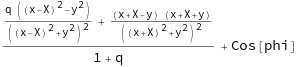

In [15]:
real = FullSimplify[ComplexExpand[Re[equ], (x \[Element] Reals && y \[Element] Reals)]]


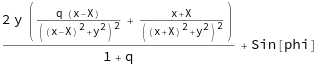

In [16]:
img = FullSimplify[ComplexExpand[Im[equ], (x \[Element] Reals && y \[Element] Reals)]]

In [17]:
(* Solve[real==0&&img==0,{x, y}, Reals] *)

In [18]:
X = 0.2;
q = 1;

In [20]:
phi = Pi/4;
(* out = Solve[real==0&&img==0,{x, y}] *)

In [22]:
outre = NSolve[real==0&&img==0,{x, y}, Reals]
(* Conjugate[zz] *)
(* [Sin[x + I y]] *)
(* Reduce[y\[Element] Reals&& x\[Element] Reals, out] *)

In [26]:
(* ComplexExpand[Conjugate[x + I y]] *)

(* ComplexExpand[expr]
假定所有变量都是实数来展开 expr. *)
(* x/.outre[[1,1]]
y/.outre[[1,2]]
x/.outre[[2,1]]
y/.outre[[2,2]] *)


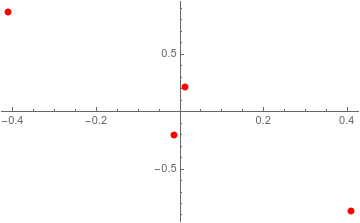
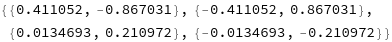

In [29]:
(* Length[outre] *)
pxy={};
For[i = 1,
i <= Length[outre], i++,
(* AppendTo[pxy{1}, x/.outre[[i,1]]];
AppendTo[pxy{2}, y/.outre[[i,2]]]; *)
AppendTo[pxy, {x/.outre[[i,1]], y/.outre[[i,2]]} ];
]
ListPlot[pxy,PlotStyle -> {Red, PointSize[Large]}]
pxy

In [307]:
q=1;
X=0.5;

(* compute critical lines *)
pxy={};
phi=0
Nsec = 1000;
(* While[phi<=Pi,
outre = NSolve[real==0&&img==0,{x, y}, Reals];
For[i = 1,
i <= Length[outre], i++,
AppendTo[pxy, {x/.outre[[i,1]], y/.outre[[i,2]]} ];
]
phi = phi + Pi/Nsec;
Print[phi];
] *)

For[j=0,j<Nsec, j++,
phi = j*2Pi/Nsec;
outre = NSolve[real==0&&img==0,{x, y}, Reals];
For[i = 1,
i <= Length[outre], i++,
AppendTo[pxy, {x/.outre[[i,1]], y/.outre[[i,2]]} ];
]
(* Print[phi]; *)
];


0

In [315]:
(* compute caustics *)
cauxy = {}
(* S = x + I y + m1/(X - x - I y) + m2/(-X - x - I y); *)
(* reals = FullSimplify[ComplexExpand[Re[S], (x \[Element] Reals && y \[Element] Reals)]];
imgs = FullSimplify[ComplexExpand[Im[S], (x \[Element] Reals && y \[Element] Reals)]]; *)
For[i = 1,
i <= Length[pxy], i++,
x = pxy[[i,1]];
y = pxy[[i,2]];
reals = x + m1*(X-x)/((X-x)^2+y^2) + m2*(-X-x)/((-X-x)^2+y^2);
imgs = y + m1*y/((X-x)^2+y^2) + m2*y/((-X-x)^2+y^2);
AppendTo[cauxy, {reals, imgs} ];
]


{}


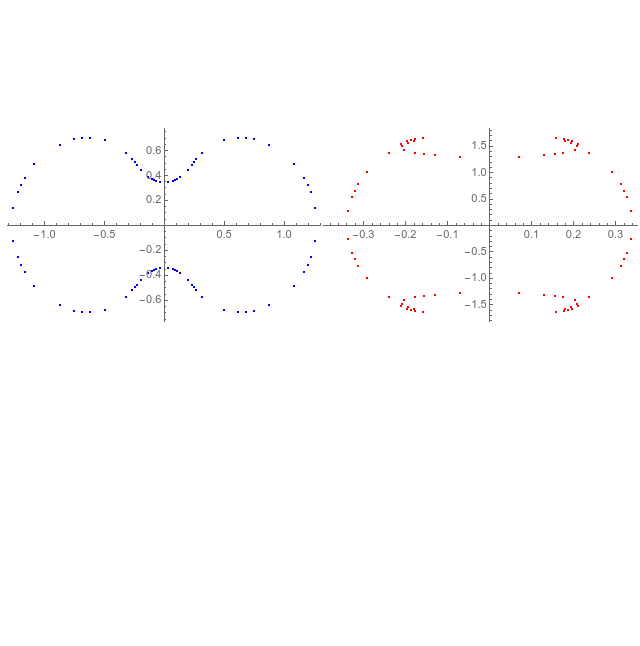

In [320]:
plot1 = ListPlot[pxy,PlotStyle -> {Blue, PointSize[0.005]}];
plot2 = ListPlot[cauxy,PlotStyle -> {Red, PointSize[0.005]}];
(* Joined->True *)
(* Show[plot1, plot2, PlotRange -> All] *)
(* Grid[{{plot1, plot2}}, ItemSize -> {{20, 20}}, Frame -> All] *)
(* Show[Graphics[{Rectangle[{0, 0}, {1, 1}, plot1], 
  Rectangle[{0.7, 0.4}, {1, 1}, plot2]}]] *)
  
Show[Graphics[{Rectangle[{0, 0}, {1, 1}, plot1], 
  Rectangle[{1, 0}, {2, 1}, plot2]}] , ImageSize->640]

(* Show[Graphics[{Rectangle[{-3, 0}, {1, 1}, plot1], 
  Rectangle[{-3, 1}, {1, 2}, plot2]}] , ImageSize->960] *)

(* https://wenku.baidu.com/view/667bf84353d380eb6294dd88d0d233d4b14e3f32.html *)

In [91]:
S = x + I y + m1/(X - x - I y) + m2/(-X - x - I y);

In [92]:
sx = FullSimplify[ComplexExpand[Re[S], (x \[Element] Reals && y \[Element] Reals)]]

-0.297263

In [93]:
sy = FullSimplify[ComplexExpand[Im[S], (x \[Element] Reals && y \[Element] Reals)]]

1.55402